In [1]:
import pandas as pd

df = pd.read_csv('../data/clean_data.csv', index_col='Municipality')
df.drop('missing_count', axis=1, inplace=True)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
# Split label from data
labels = df.filter(like='catalan').columns
df = df.loc[:, ~df.columns.isin(labels)]

In [4]:
num_features = df.select_dtypes(include='number').columns
cat_features = df.select_dtypes(exclude='number').columns

In [5]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features),
    ],
    verbose_feature_names_out=False
)

In [6]:
preprocessed_data = preprocessor.fit_transform(df)
cols = preprocessor.get_feature_names_out()

In [13]:
pca = PCA()
pca_data = pca.fit_transform(preprocessed_data)
exp_var = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var)

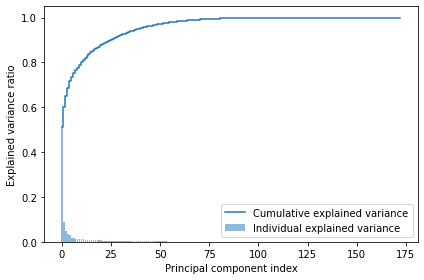

In [15]:
plt.bar(range(0,len(exp_var)), exp_var, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Cumulative explained variance: 0.79


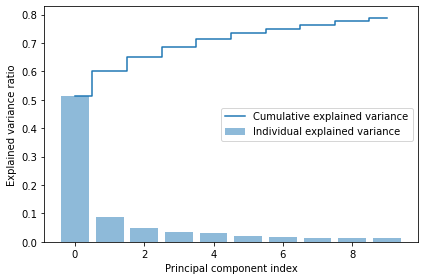

In [32]:
def cumulative_exp_car(components=10):
    exp_var_filtered = exp_var[0:components]
    cum_sum_filtered = cum_sum_eigenvalues[0:components]
    print('Cumulative explained variance:', round(cum_sum_filtered[components-1], 2))
    plt.bar(range(0,len(exp_var_filtered)), exp_var_filtered, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_filtered)), cum_sum_filtered, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
cumulative_exp_car()

In [36]:
loadings = pca.components_
num_pc = 10 #pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = cols
loadings_df = loadings_df.set_index('variable')
loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
variable,,,,,,,,,,
territory__altitude,-0.036981,0.003585,0.051294,-0.009752,-0.213259,0.051169,0.009920,-0.002957,0.226724,-0.002728
territory__longitude,0.017370,-0.088491,0.177456,-0.129563,0.040389,-0.052573,-0.319457,0.125986,-0.099005,-0.158161
territory__latitude,-0.022510,-0.033007,0.173810,-0.076201,-0.188424,-0.120799,-0.320164,0.128630,0.090775,-0.067455
territory__geographic_indicators_utm_coordinates_x_utm_coordinates_x,0.017148,-0.088536,0.178938,-0.130265,0.037591,-0.053968,-0.320942,0.126034,-0.096538,-0.157926
territory__geographic_indicators_utm_coordinates_y_utm_coordinates_y,-0.023177,-0.031319,0.171800,-0.073701,-0.190943,-0.121148,-0.317650,0.128271,0.092948,-0.064829


In [90]:
def top_dimensions(df, n=10):
    import pandas as pd
    
    top_df = pd.DataFrame()
    for col in df.columns:
        vars_ix = df.loc[:, col].apply(lambda x: abs(x)).sort_values(ascending=False)[0:n].index
        new_col = df.loc[vars_ix, col].sort_values(ascending=False).reset_index().apply(lambda x : '{} ({})'.format(x[0],x[1]), axis=1)
        top_df = pd.concat([top_df, pd.DataFrame(new_col, columns=[col])], axis=1)
        
    return top_df

top_dimensions(loadings_df)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,quality_of_life_type_of_dwellings_main (0.1118...,economic_sectors_used_agricultural_area_cultiv...,economic_sectors_tourist_accommodation_campsit...,quality_of_life_type_of_dwellings_secondary (0...,population_population_growth_2001_2011_growth_...,elections_elections_to_the_european_parliament...,economic_sectors_used_agricultural_area_perman...,labour_affiliations_to_general_system_accordin...,education_level_of_education_attained_second_s...,economic_sectors_head_of_livestock_porcine (0....
1,population_population_by_sex_men (0.1117858022...,labour_affiliations_to_self_employed_system_ac...,economic_sectors_tourist_accommodation_hotels ...,economic_sectors_tourist_accommodation_hotel_b...,population_population_growth_2001_2011_migrati...,elections_elections_to_the_congress_of_deputie...,economic_sectors_head_of_livestock_equine (0.2...,environment_industrial_waste_industrial_waste ...,territory__altitude (0.2267237611536716),economic_sectors_tourist_accommodation_hotel_b...
2,population_population_by_sex_total (0.11170203...,economic_sectors_cultivated_land_total (0.2355...,economic_sectors_used_agricultural_area_perman...,economic_sectors_tourist_accommodation_campsit...,main_aggregates_urban_property_tax_integral_qu...,elections_elections_to_the_parliament_of_catal...,environment_industrial_waste_industrial_waste ...,economic_sectors_tourist_accommodation_hotel_b...,economic_sectors_cultivated_land_vines (0.2045...,economic_sectors_land_ownership_without_land (...
3,population_men_population_from_15_to_64_years ...,economic_sectors_land_ownership_total (0.22757...,economic_sectors_head_of_livestock_equine (0.1...,population_external_immigrations_by_place_of_o...,population_population_growth_2001_2011_increas...,education_level_of_education_attained_higher_e...,labour_affiliations_to_general_system_accordin...,labour_affiliations_to_gen_system_according_to...,population_population_growth_2001_2011_migrati...,population_external_immigrations_by_place_of_o...
4,population_population_by_age_groups_from_15_to...,economic_sectors_land_ownership_with_land (0.2...,territory__geographic_indicators_utm_coordinat...,main_aggregates_urban_property_tax_taxable_bas...,main_aggregates_urban_property_tax_taxable_bas...,elections_municipal_elections_turnout (0.17833...,environment_municipal_waste_generation_per_cap...,environment_industrial_waste_establishments_wi...,population_population_growth_2001_2011_growth_...,economic_sectors_head_of_livestock_avian (0.16...
5,population_population_by_sex_women (0.11156494...,economic_sectors_used_agricultural_area_total ...,territory__longitude (0.17745643981880915),labour_affiliations_to_general_system_accordin...,population_internal_migrations_destination_ori...,economic_sectors_cultivated_land_vines (0.1490...,labour_registered_unemployment_by_sectors_by_s...,economic_sectors_tourist_accommodation_hotels ...,economic_sectors_head_of_livestock_porcine (-0...,economic_sectors_cultivated_land_herbaceous_cr...
6,population_women_population_from_15_to_64_year...,economic_sectors_livestock_ownership_with_live...,territory__latitude (0.17381023371445736),education_level_of_education_attained_higher_e...,population_internal_migrations_destination_ori...,population_population_growth_2001_2011_migrati...,territory__geographic_indicators_utm_coordinat...,culture_sports_facilities_indoor_swimming_pool...,population_study_reasons_students_who_study_in...,territory__longitude (-0.1581610642135134)
7,labour_contributors_to_social_security_accordi...,economic_sectors_livestock_ownership_without_l...,territory__geographic_indicators_utm_coordinat...,environment_industrial_waste_establishments_wi...,territory__latitude (-0.18842435187847162),population_population_growth_2001_2011_increas...,territory__longitude (-0.31945729315618115),labour_affiliations_to_gen_system_according_to...,education_level_of_education_attained_first_st...,population_internal_migrations_desti

In [83]:
vars_ix = loadings_df.loc[:, 'PC4'].apply(lambda x: abs(x)).sort_values(ascending=False)[0:10].index
aux = loadings_df.loc[vars_ix, 'PC4'].sort_values(ascending=False).reset_index().apply(lambda x : '{} ({})'.format(x[0],x[1]), axis=1)

In [86]:
pd.DataFrame(aux, columns=['PCA1'])

,PCA1
0,quality_of_life_type_of_dwellings_secondary (0...
1,economic_sectors_tourist_accommodation_hotel_b...
2,economic_sectors_tourist_accommodation_campsit...
3,population_external_immigrations_by_place_of_o...
4,main_aggregates_urban_property_tax_taxable_bas...
5,labour_affiliations_to_general_system_accordin...
6,education_level_of_education_attained_higher_e...
7,environment_industrial_waste_establishments_wi...
8,elections_elections_to_the_parliament_of_catal...
9,main_aggregates_personal_taxable_base_by_decla...
